In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
#import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


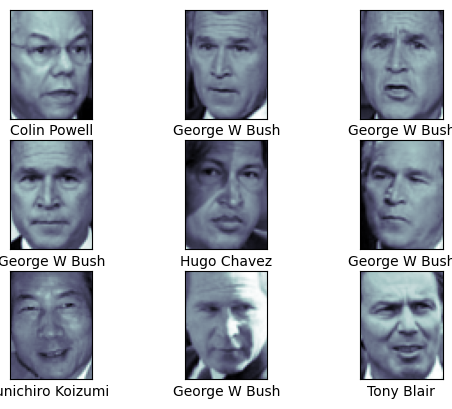

In [3]:
#Lets plot few of them:
fig, ax = plt.subplots(3, 3)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [4]:
#Splitting the Training-Testing Data:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target)

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Xtrain, ytrain)

/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
yfit = model.predict(Xtest)

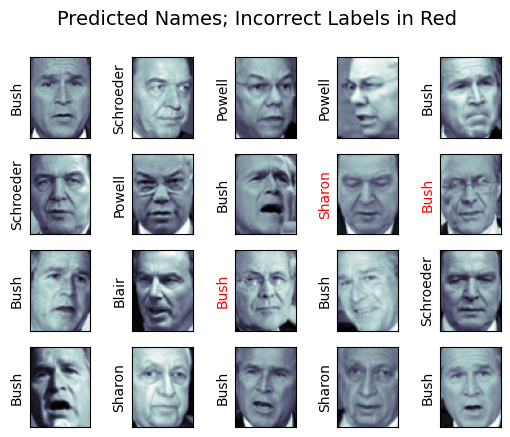

In [7]:
#SOme test pattern with their prediction:
fig, ax = plt.subplots(4, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [8]:
#Lets look on classification report:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))
cm = confusion_matrix(ytest, yfit)
print(cm)

                   precision    recall  f1-score   support

     Ariel Sharon       0.70      0.76      0.73        21
     Colin Powell       0.71      0.88      0.79        48
  Donald Rumsfeld       0.74      0.65      0.69        26
    George W Bush       0.92      0.88      0.90       140
Gerhard Schroeder       0.70      0.78      0.74        27
      Hugo Chavez       0.73      0.69      0.71        16
Junichiro Koizumi       0.94      0.76      0.84        21
       Tony Blair       0.75      0.71      0.73        38

         accuracy                           0.81       337
        macro avg       0.77      0.76      0.77       337
     weighted avg       0.82      0.81      0.81       337

[[ 16   1   1   1   0   1   0   1]
 [  2  42   1   1   0   0   0   2]
 [  2   2  17   4   0   1   0   0]
 [  2   8   2 123   2   0   1   2]
 [  1   0   1   1  21   0   0   3]
 [  0   2   0   1   1  11   0   1]
 [  0   2   0   0   1   2  16   0]
 [  0   2   1   3   5   0   0  27]]
